In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import median_filter, gaussian_filter
import matplotlib.pyplot as plt

# a) Đọc ảnh “coins.tif” và giảm độ sáng của ảnh xuống 50

In [2]:
image = cv2.imread('coins.tif', cv2.IMREAD_GRAYSCALE)
darkened_image = np.clip(image - 50, 0, 255).astype(np.uint8)

In [3]:
psnr_darkened = psnr(image, darkened_image)
ssim_darkened = ssim(image, darkened_image, data_range=darkened_image.max() - darkened_image.min())
print(f"PSNR sau giảm độ sáng: {psnr_darkened}")
print(f"SSIM sau giảm độ sáng: {ssim_darkened}")

PSNR sau giảm độ sáng: 14.151403521958727
SSIM sau giảm độ sáng: 0.9327784970748756


# nhận xét : 
## việc giảm độ sáng ít gây nhiễu và làm xáo trộn cấu trúc của ảnh

# b) Thêm nhiễu muối tiêu và nhiễu Gaussian

In [4]:
salt_pepper_noise = random_noise(darkened_image, mode='s&p', amount=0.05)  
noisy_image = random_noise(salt_pepper_noise, mode='gaussian', var=0.01)

In [5]:
noisy_image = (noisy_image * 255).astype(np.uint8)

In [6]:
psnr_noisy = psnr(image, noisy_image)
ssim_noisy = ssim(image, noisy_image, data_range=noisy_image.max() - noisy_image.min())
print(f"PSNR sau thêm nhiễu: {psnr_noisy}")
print(f"SSIM sau thêm nhiễu: {ssim_noisy}")

PSNR sau thêm nhiễu: 11.99089351583969
SSIM sau thêm nhiễu: 0.15078245526677522


# c) Áp dụng cân bằng histogram để cải thiện độ tương phản trước khi xử lý nhiễu

In [7]:
equalized_image = cv2.equalizeHist(noisy_image)

In [8]:
psnr_equalized = psnr(image, equalized_image)
ssim_equalized = ssim(image, equalized_image, data_range=equalized_image.max() - equalized_image.min())
print(f"PSNR sau cân bằng histogram: {psnr_equalized}")
print(f"SSIM sau cân bằng histogram: {ssim_equalized}")

PSNR sau cân bằng histogram: 8.894260242718365
SSIM sau cân bằng histogram: 0.08918873706890451


# nhận xét :
## cân bằng histogram cải thiện độ tương phản và có thể giúp nhìn rõ các chi tiết hơn, nhưng nó có thể làm giảm các chỉ số PSNR và SSIM khi so sánh với ảnh gốc, bởi các chỉ số này ưu tiên tính toàn vẹn của giá trị pixel và sự tương đồng cấu trúc với ảnh ban đầu.

# d) Áp dụng các bộ lọc median và Gaussian để khử nhiễu

In [9]:
median_filtered_image = median_filter(equalized_image, size=3)
psnr_median = psnr(image, median_filtered_image)
ssim_median = ssim(image, median_filtered_image, data_range=median_filtered_image.max() - median_filtered_image.min())
print(f"PSNR sau lọc trung vị: {psnr_median}")
print(f"SSIM sau lọc trung vị: {ssim_median}")
gaussian_filtered_image = gaussian_filter(median_filtered_image, sigma=1)
psnr_gaussian = psnr(image, gaussian_filtered_image)
ssim_gaussian = ssim(image, gaussian_filtered_image, data_range=gaussian_filtered_image.max() - gaussian_filtered_image.min())
print(f"PSNR sau lọc Gaussian: {psnr_gaussian}")
print(f"SSIM sau lọc Gaussian: {ssim_gaussian}")

PSNR sau lọc trung vị: 10.227020410155173
SSIM sau lọc trung vị: 0.159560005818358
PSNR sau lọc Gaussian: 10.41175983005163
SSIM sau lọc Gaussian: 0.2398038081686896


# f) Hiển thị ảnh sau các bước.

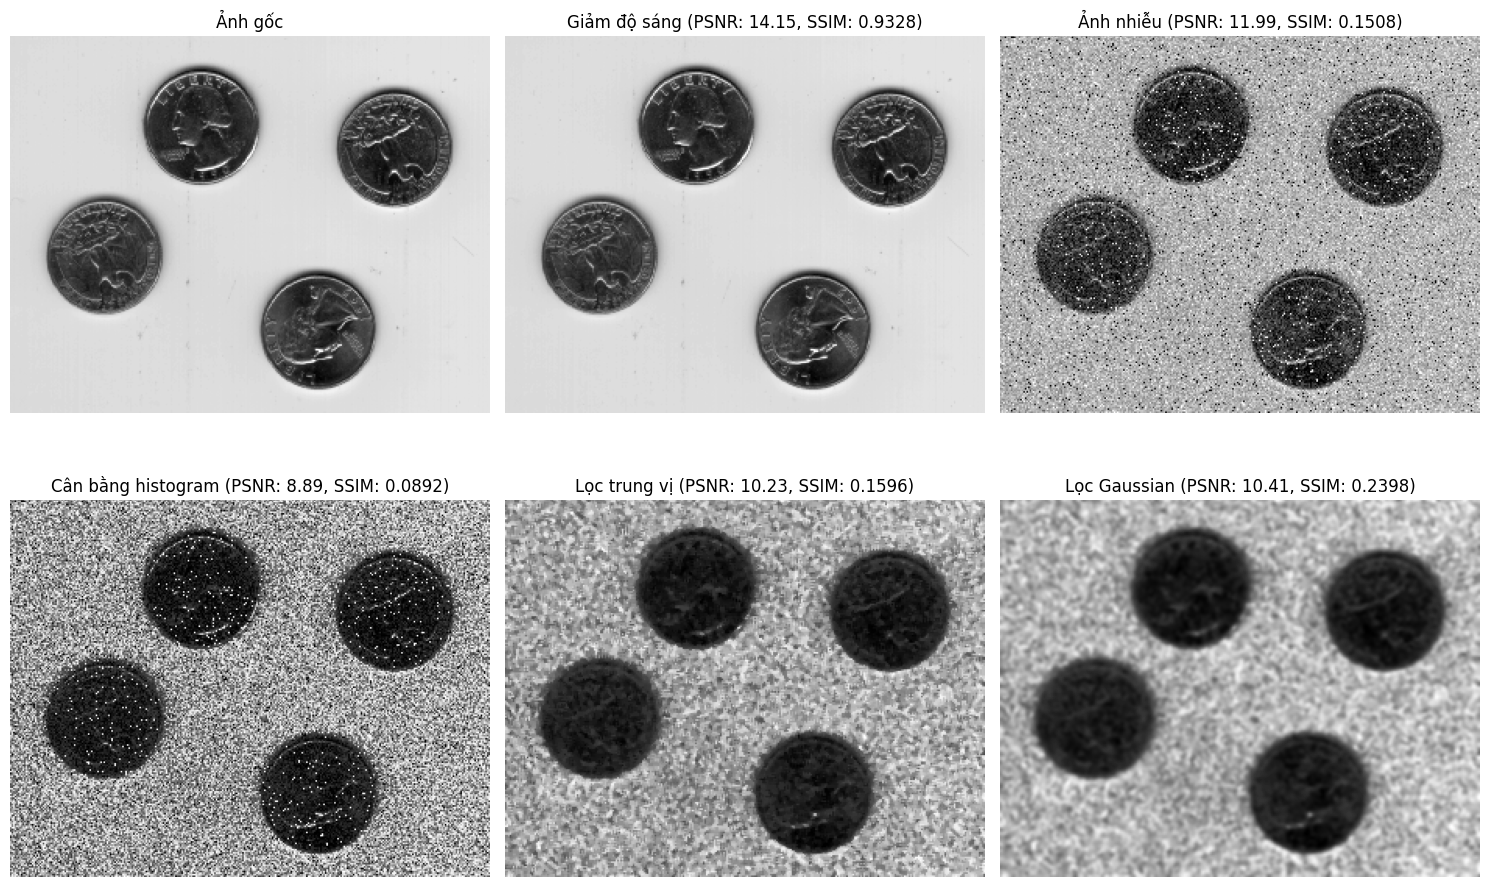

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Ảnh gốc')

axes[0, 1].imshow(darkened_image, cmap='gray')
axes[0, 1].set_title(f'Giảm độ sáng (PSNR: {psnr_darkened:.2f}, SSIM: {ssim_darkened:.4f})')

axes[0, 2].imshow(noisy_image, cmap='gray')
axes[0, 2].set_title(f'Ảnh nhiễu (PSNR: {psnr_noisy:.2f}, SSIM: {ssim_noisy:.4f})')

axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title(f'Cân bằng histogram (PSNR: {psnr_equalized:.2f}, SSIM: {ssim_equalized:.4f})')

axes[1, 1].imshow(median_filtered_image, cmap='gray')
axes[1, 1].set_title(f'Lọc trung vị (PSNR: {psnr_median:.2f}, SSIM: {ssim_median:.4f})')

axes[1, 2].imshow(gaussian_filtered_image, cmap='gray')
axes[1, 2].set_title(f'Lọc Gaussian (PSNR: {psnr_gaussian:.2f}, SSIM: {ssim_gaussian:.4f})')

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()